In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [405]:
run script_held_out_prediction.py


Starting Parallel for 432 parameter settings
.................................................Spike at sim 3 est 5 ho 0 noise 0.0
.Spike at sim 3 est 4 ho 0 noise 1.0
Spike at sim 3 est 5 ho 0 noise 1.0
Spike at sim 3 est 5 ho 0 noise 1.0
.Spike at sim 3 est 3 ho 0 noise 0.0
.Spike at sim 3 est 6 ho 0 noise 0.0
Spike at sim 3 est 6 ho 0 noise 0.1
....Spike at sim 3 est 5 ho 0 noise 0.1
Spike at sim 3 est 4 ho 0 noise 0.0
.Spike at sim 3 est 5 ho 0 noise 0.0
.Spike at sim 3 est 5 ho 0 noise 0.1
.....Spike at sim 3 est 6 ho 0 noise 1.0
Spike at sim 3 est 4 ho 0 noise 0.1
.Spike at sim 3 est 3 ho 0 noise 0.1
...Spike at sim 3 est 3 ho 0 noise 1.0
.Spike at sim 3 est 4 ho 0 noise 0.0
Spike at sim 3 est 4 ho 0 noise 0.1
.Spike at sim 3 est 3 ho 0 noise 0.0
Spike at sim 3 est 6 ho 0 noise 0.0
.Spike at sim 3 est 3 ho 0 noise 0.1
Spike at sim 3 est 4 ho 0 noise 1.0
..Spike at sim 3 est 6 ho 0 noise 1.0
Spike at sim 3 est 3 ho 0 noise 1.0
Spike at sim 3 est 6 ho 0 noise 0.1
.Removing strongest

In [406]:
fitted_train_resids.reshape(6, 6, 2, len(noise_levels), -1).mean(-1).mean(2).shape
zm_fitted_test_resid.shape

Removing strongest entry
Removing strongest entry
.Removing strongest entry
Removing strongest entry
.Removing strongest entry
Removing strongest entry
Removing strongest entry
.Removing strongest entry
Removing strongest entry
.Spike at sim 5 est 4 ho 0 noise 1.0
.Spike at sim 4 est 6 ho 0 noise 1.0
....Spike at sim 4 est 6 ho 0 noise 1.0
Spike at sim 4 est 6 ho 0 noise 0.1
..Spike at sim 6 est 7 ho 0 noise 0.1
....Spike at sim 4 est 5 ho 0 noise 0.1
Spike at sim 4 est 7 ho 0 noise 0.1
.Spike at sim 5 est 3 ho 0 noise 0.0
Spike at sim 4 est 7 ho 0 noise 1.0
.Spike at sim 5 est 3 ho 0 noise 1.0
.Spike at sim 4 est 7 ho 0 noise 1.0
.Spike at sim 4 est 8 ho 0 noise 0.0
Spike at sim 4 est 5 ho 0 noise 1.0
..............Spike at sim 4 est 5 ho 0 noise 1.0
Spike at sim 5 est 6 ho 0 noise 0.1
...Spike at sim 4 est 8 ho 0 noise 1.0
Removing strongest entry
Removing strongest entry
.Removing strongest entry
Removing strongest entry
Removing strongest entry
.Removing strongest entry
Removing st

(6, 6, 2, 3, 2)

Removing strongest entry
Removing strongest entry
Removing strongest entry
Removing strongest entry
Removing strongest entry
Removing strongest entry
Removing strongest entry
Removing strongest entry
Removing strongest entry
Removing strongest entry
Removing strongest entry
Removing strongest entry
Removing strongest entry
Removing strongest entry
Removing strongest entry
Removing strongest entry
Removing strongest entry
.Removing strongest entry
.Removing strongest entry
Removing strongest entry
.Removing strongest entry
...Spike at sim 4 est 5 ho 0 noise 0.0
.Spike at sim 4 est 7 ho 0 noise 0.1
Spike at sim 5 est 4 ho 0 noise 0.1
........Spike at sim 4 est 7 ho 0 noise 0.0
..Spike at sim 5 est 3 ho 0 noise 0.0
..Spike at sim 5 est 4 ho 0 noise 0.0
...Spike at sim 7 est 4 ho 0 noise 0.0
..Spike at sim 5 est 6 ho 0 noise 0.0
.Spike at sim 5 est 7 ho 0 noise 0.0
Spike at sim 5 est 6 ho 0 noise 1.0
Spike at sim 5 est 3 ho 0 noise 0.1
.Spike at sim 6 est 3 ho 0 noise 1.0
.Spike at sim 5 e

Removing strongest entry
Removing strongest entry
..Removing strongest entry
.Removing strongest entry
Removing strongest entry
Spike at sim 6 est 6 ho 0 noise 0.1
.Spike at sim 6 est 7 ho 0 noise 0.0
.........Spike at sim 6 est 8 ho 0 noise 0.1
.Spike at sim 6 est 4 ho 0 noise 0.1
.Spike at sim 5 est 7 ho 0 noise 0.1
.Spike at sim 6 est 4 ho 0 noise 0.0
.Spike at sim 6 est 5 ho 0 noise 0.0
.Spike at sim 6 est 4 ho 0 noise 0.0
....Spike at sim 6 est 3 ho 0 noise 0.0
.Spike at sim 7 est 3 ho 0 noise 0.0
Spike at sim 7 est 4 ho 0 noise 0.0
......Spike at sim 8 est 6 ho 0 noise 0.0
Spike at sim 6 est 8 ho 0 noise 0.1
..Spike at sim 5 est 8 ho 0 noise 0.1
Spike at sim 6 est 3 ho 0 noise 1.0
....Removing strongest entry
Removing strongest entry
.....Removing strongest entry
Removing strongest entry
.Removing strongest entry
.Removing strongest entry
.Removing strongest entry
Removing strongest entry
..Removing strongest entry
Removing strongest entry
Removing strongest entry
..Removing stro

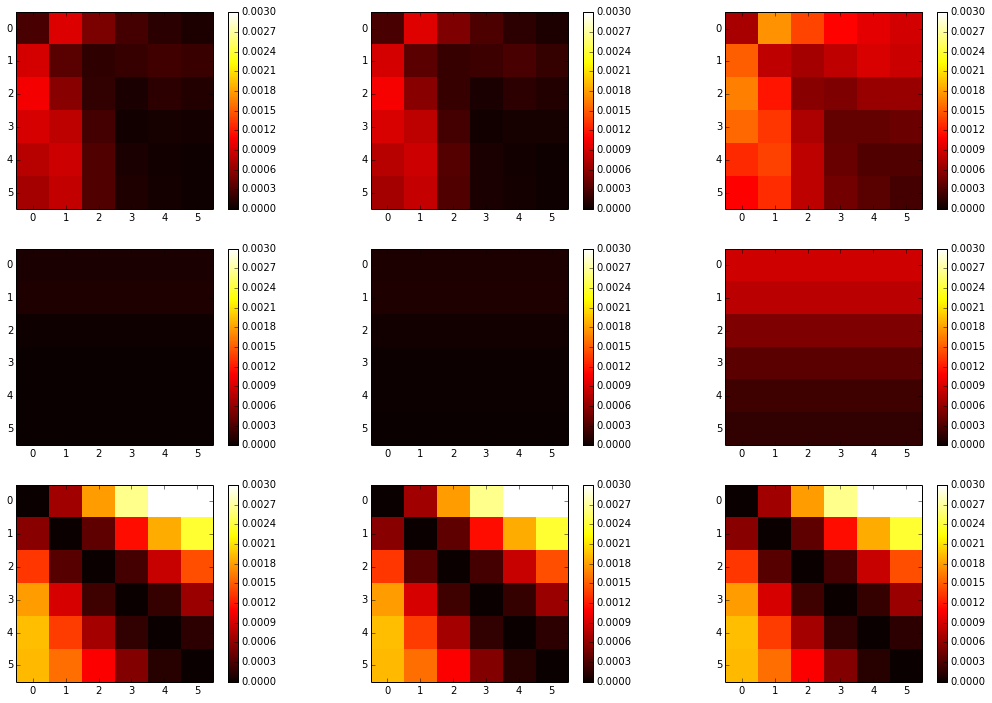

..Removing strongest entry
.Removing strongest entry
..Removing strongest entry
Removing strongest entry
.Removing strongest entry
.Removing strongest entry
Removing strongest entry
Removing strongest entry
Removing strongest entry
Spike at sim 7 est 7 ho 0 noise 0.1
..Spike at sim 5 est 8 ho 0 noise 1.0
Spike at sim 8 est 3 ho 0 noise 1.0
Spike at sim 6 est 5 ho 0 noise 1.0
Spike at sim 6 est 8 ho 0 noise 0.0
Spike at sim 7 est 3 ho 0 noise 1.0
Spike at sim 8 est 5 ho 0 noise 0.1
.Spike at sim 6 est 8 ho 0 noise 0.0
Spike at sim 8 est 7 ho 0 noise 1.0
.Spike at sim 7 est 4 ho 0 noise 0.1
.Spike at sim 7 est 3 ho 0 noise 0.1
.Spike at sim 8 est 4 ho 0 noise 0.1
.Spike at sim 8 est 7 ho 0 noise 1.0
..Spike at sim 7 est 4 ho 0 noise 1.0
Spike at sim 7 est 6 ho 0 noise 1.0
Spike at sim 7 est 4 ho 0 noise 0.1
.Spike at sim 6 est 8 ho 0 noise 1.0
Spike at sim 7 est 5 ho 0 noise 0.1
Spike at sim 6 est 8 ho 0 noise 1.0
Spike at sim 8 est 6 ho 0 noise 0.0
.Spike at sim 8 est 6 ho 0 noise 1.0
.

In [407]:
vmax = .003
plt.figure(figsize=(18, 12))
for i in range(len(noise_levels)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(
        fitted_test_squashed_resids.mean(-1).mean(2)[..., i],
        interpolation='nearest', vmin=0, vmax=vmax)
    plt.colorbar()
for i in range(len(noise_levels)):
    plt.subplot(3, 3, i + 1 + 3)
    plt.imshow(
        zm_fitted_test_squashed_resid.mean(-1).mean(2)[..., i],
        interpolation='nearest', vmin=0, vmax=vmax)
    plt.colorbar()
for i in range(len(noise_levels)):
    plt.subplot(3, 3, i + 1 + 6)
    plt.imshow(
        test_squashed_resids.mean(-1).mean(2)[..., i],
        interpolation='nearest', vmin=0, vmax=vmax)
    plt.colorbar()


Removing strongest entry
.Removing strongest entry
Removing strongest entry
Removing strongest entry
Spike at sim 8 est 5 ho 0 noise 1.0
Spike at sim 8 est 8 ho 0 noise 0.0
.Spike at sim 7 est 3 ho 0 noise 0.0
Spike at sim 8 est 7 ho 0 noise 0.1
Spike at sim 8 est 3 ho 0 noise 0.1
...Spike at sim 8 est 6 ho 0 noise 0.1
Spike at sim 8 est 3 ho 0 noise 1.0
...Spike at sim 8 est 7 ho 0 noise 0.0
Spike at sim 8 est 4 ho 0 noise 0.0
Removing strongest entry
Removing strongest entry
Removing strongest entry
Removing strongest entry
Removing strongest entry
..Removing strongest entry
Removing strongest entry
.Removing strongest entry
Removing strongest entry
.Spike at sim 7 est 8 ho 0 noise 0.0
..Spike at sim 8 est 7 ho 0 noise 0.1
.....Spike at sim 8 est 8 ho 0 noise 0.1
..Removing strongest entry
Removing strongest entry
.Removing strongest entry
Spike at sim 8 est 5 ho 0 noise 1.0
Spike at sim 8 est 4 ho 0 noise 0.0
...Spike at sim 8 est 3 ho 0 noise 0.1
...Spike at sim 8 est 6 ho 0 noise 

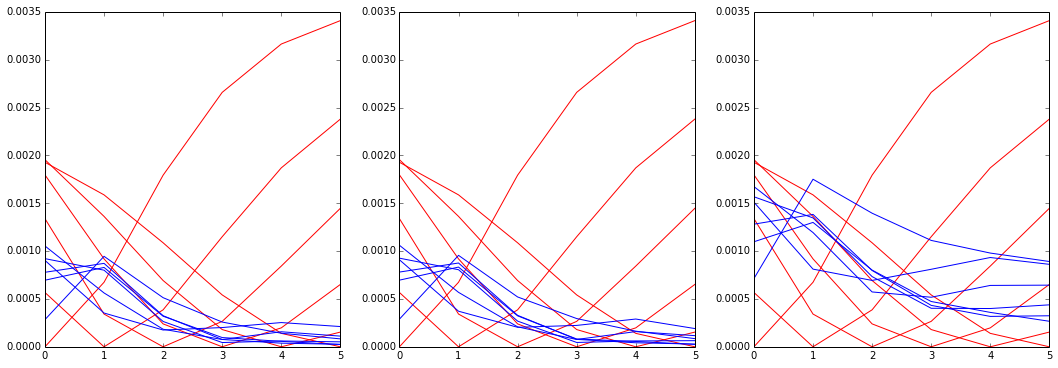

In [408]:
plt.figure(figsize=(18, 6))
for i in range(len(noise_levels)):
    plt.subplot(1, 3, i + 1)
    plt.plot(test_squashed_resids.mean(-1).mean(2)[..., i].T, 'r')
    plt.plot(fitted_test_squashed_resids.mean(-1).mean(2)[..., i].T, 'b')

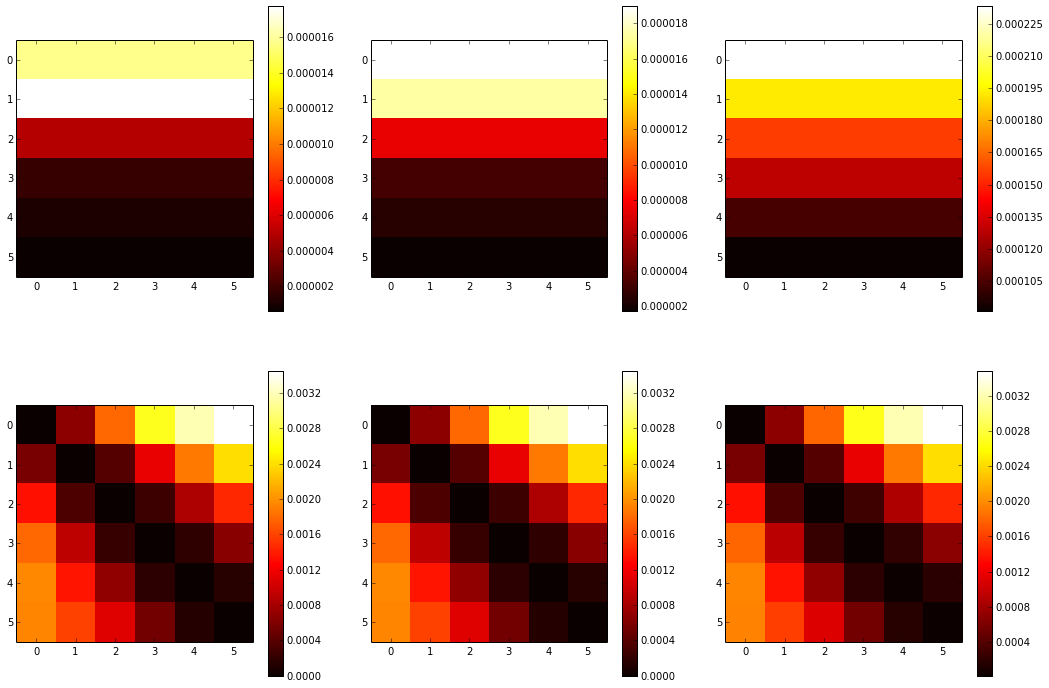

In [409]:
plt.figure(figsize=(18, 12))
for i in range(len(noise_levels)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(
        zm_fitted_test_resid.mean(-1).mean(2)[..., i],
        interpolation='nearest')
    plt.colorbar()
for i in range(len(noise_levels)):
    plt.subplot(2, 3, i + 1 + 3)
    plt.imshow(
        test_est_resids.mean(-1).mean(2)[..., i],
        interpolation='nearest')
    plt.colorbar()

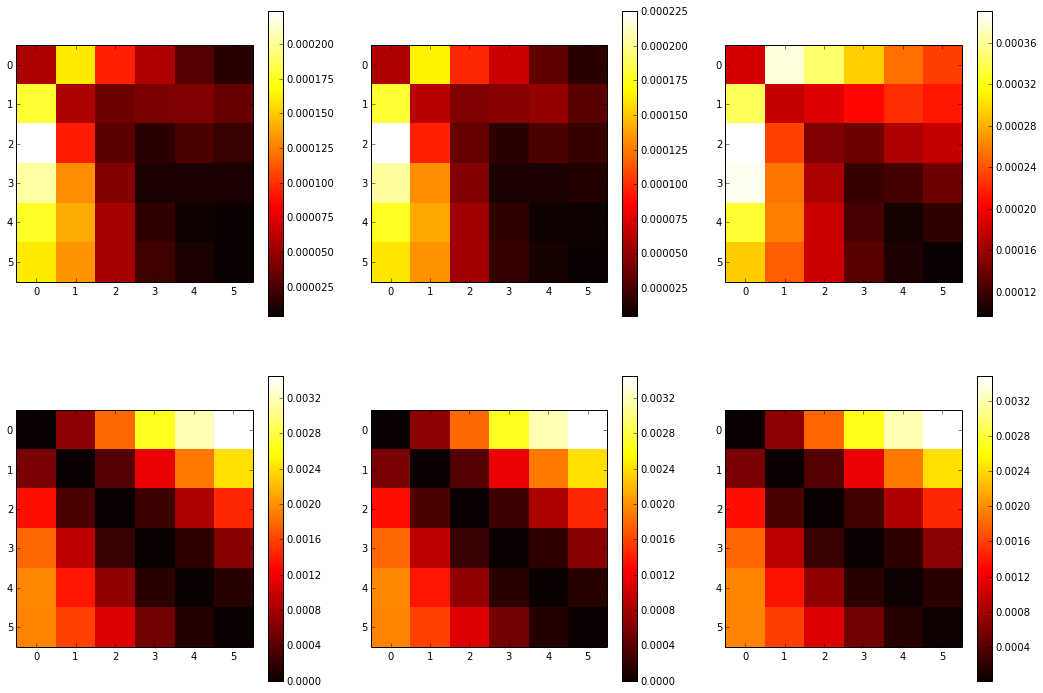

In [410]:
plt.figure(figsize=(18, 12))
for i in range(len(noise_levels)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(
        fitted_test_resids.mean(-1).mean(2)[..., i],
        interpolation='nearest')
    plt.colorbar()
for i in range(len(noise_levels)):
    plt.subplot(2, 3, i + 1 + 3)
    plt.imshow(
        test_est_resids.mean(-1).mean(2)[..., i],
        interpolation='nearest')
    plt.colorbar()


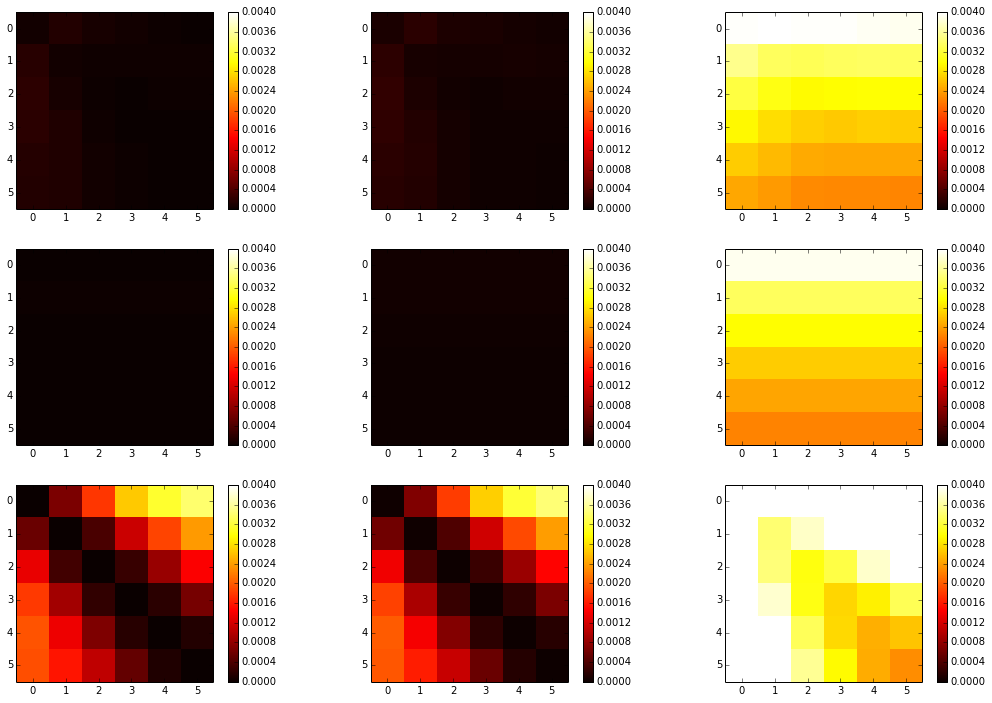

In [358]:
vmax=0.004
plt.figure(figsize=(18, 12))
for i in range(len(noise_levels)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(
        fitted_train_resids.mean(-1).mean(2)[..., i],
        interpolation='nearest', vmin=0, vmax=vmax)
    plt.colorbar()
for i in range(len(noise_levels)):
    plt.subplot(3, 3, i + 1 + 3)
    plt.imshow(
        zm_fitted_train_resid.mean(-1).mean(2)[..., i],
        interpolation='nearest', vmin=0, vmax=vmax)
    plt.colorbar()
for i in range(len(noise_levels)):
    plt.subplot(3, 3, i + 1 + 6)
    plt.imshow(
        train_est_resids.mean(-1).mean(2)[..., i],
        interpolation='nearest', vmin=0, vmax=vmax)
    plt.colorbar()


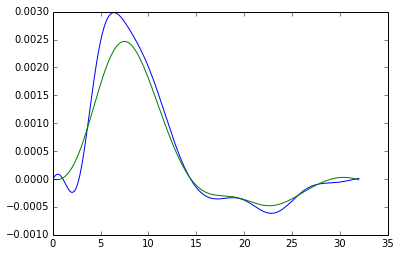

In [359]:
i, j = 5, 4
points = hrf_measurement_points[i,j,0,0,0]
hrf = hrf_measures[i,j,0,2,0]
zm_hrf = zm_hrf_measures[i,j,0,2,0]
order = np.argsort(points)
plt.plot(points[order], hrf[order])
plt.plot(points[order], zm_hrf[order])

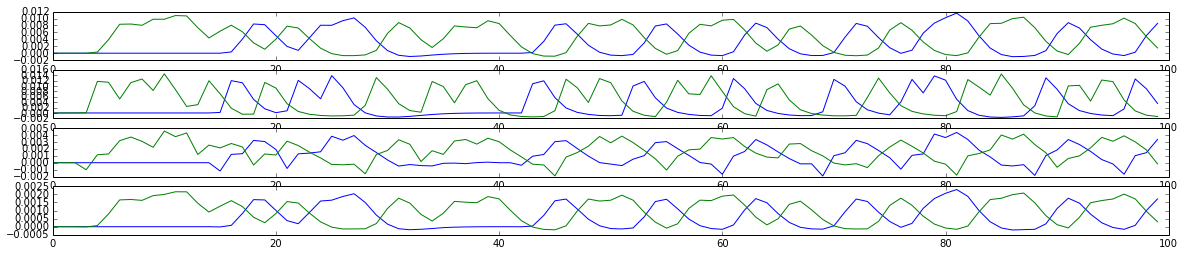

In [360]:
i, j, k = 5, 1, 1
plt.figure(figsize=(20, 4))
plt.subplot(4, 1, 1)
plt.plot(test_design_gen.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0][:100])
plt.subplot(4, 1, 2)
plt.plot(test_design_est.reshape(6, 6, 2, 3, 2, -1, 2)[i, j,0,k,0][:100])
plt.subplot(4, 1, 3)
plt.plot(fitted_test_design.reshape(6, 6, 2, 3, 2, -1, 2)[i, j,0,k,0][:100])
plt.subplot(4, 1, 4)
plt.plot(zm_fitted_test_design.reshape(6, 6, 2, 3, 2, -1, 2)[i, j,0,0,0][:100])


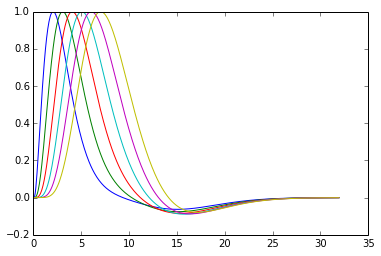

In [238]:
from nistats.hemodynamic_models import _gamma_difference_hrf
true_hrfs = np.array([_gamma_difference_hrf(1, 16., time_length=32, delay=t)
                          for t in hrf_peak_locations])
xs = np.linspace(0., 32., true_hrfs.shape[1], endpoint=False)
normed_hrfs = true_hrfs / true_hrfs.max(axis=1)[:, np.newaxis]
plt.plot(xs, normed_hrfs.T)

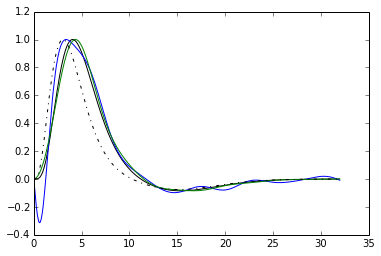

In [361]:
i, j, k = 2, 1, 0
plt.plot(xs, normed_hrfs[i], 'k')
hrf = hrf_measures[i,j,0,k,0]
plt.plot(points[order], hrf / hrf.max())
zhrf = zm_hrf_measures[i,j,0,k,0]
plt.plot(points[order], zhrf / zhrf.max())
plt.plot(xs, normed_hrfs[j], 'k-.')

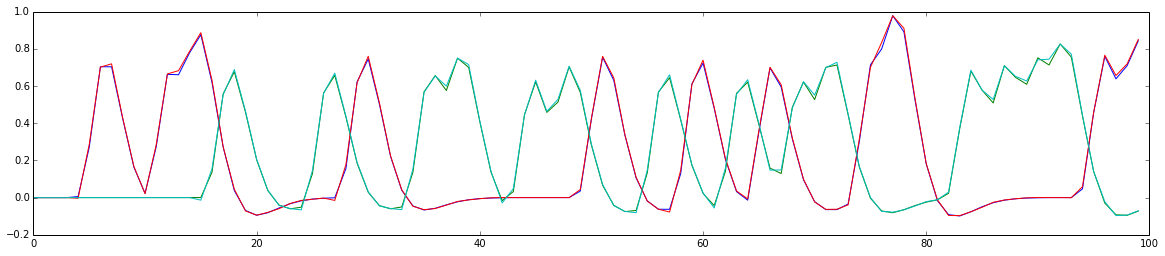

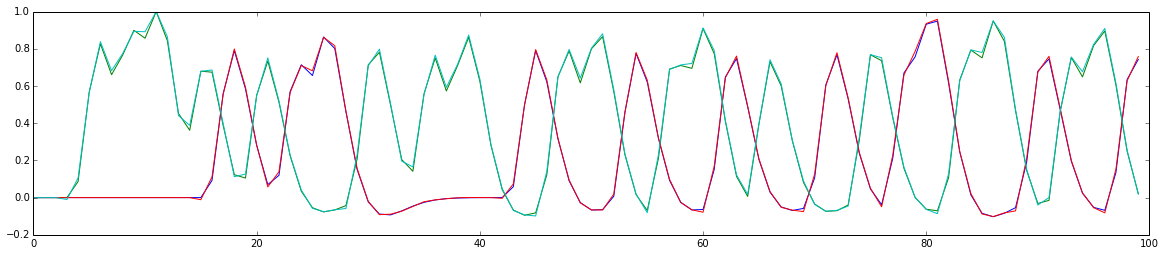

In [396]:
i, j, k = 4, 1, 0

ytr = y_train_noisy.reshape(6, 6, 2, 3, 2, -1)[i, j, 0, k, 0, :]
yt = y_test.reshape(6, 6, 2, 3, 2, -1)[i, j, 0, k, 0, :]
ytn = np.linalg.norm(yt) ** 2
ytrn = np.linalg.norm(ytr) ** 2

dtrg = train_design_gen.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0]
dtre = train_design_gen.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0]
dtg = test_design_gen.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0]
dte = test_design_gen.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0]
dtrf = fitted_train_design.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0]
dtf = fitted_test_design.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0]
dtrfz = zm_fitted_train_design.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0]
dtfz = zm_fitted_test_design.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0]

sdtrfz = np.max(dtrfz, 0) / np.max(dtrg, 0)
dtrfz = dtrfz / sdtrfz
dtfz = dtfz / sdtrfz

bg = np.linalg.pinv(dtrg).dot(ytr)
be = np.linalg.pinv(dtre).dot(ytr)
bf = np.linalg.pinv(dtrf).dot(ytr)
bfz = np.linalg.pinv(dtrfz).dot(ytr)

ptrg = dtrg.dot(bg)
ptre = dtre.dot(be)
ptrf = dtrf.dot(bf)
ptrfz = dtrfz.dot(bfz)

ptg = dtg.dot(bg)
pte = dte.dot(be)
ptf = dtf.dot(bf)
ptfz = dtfz.dot(bfz)

rtrg = np.linalg.norm(ytr - ptrg) ** 2
rtre = np.linalg.norm(ytr - ptre) ** 2
rtrf = np.linalg.norm(ytr - ptrf) ** 2
rtrfz = np.linalg.norm(ytr - ptrfz) ** 2

rtg = np.linalg.norm(yt - ptg) ** 2
rte = np.linalg.norm(yt - pte) ** 2
rtf = np.linalg.norm(yt - ptf) ** 2
rtfz = np.linalg.norm(yt - ptfz) ** 2

plt.figure(figsize=(20, 4))
plt.plot(dtrg[:100] / dtrg.max(0))
#plt.plot(dtrf[:100] / dtrf.max(0))
plt.plot(dtrfz[:100] / dtrfz.max(0))
plt.figure(figsize=(20, 4))
plt.plot(dtg[:100] / dtg.max(0))
#plt.plot(dtf[:100] / dtf[:100].max(0))
plt.plot(dtfz[:100] / dtfz.max(0))


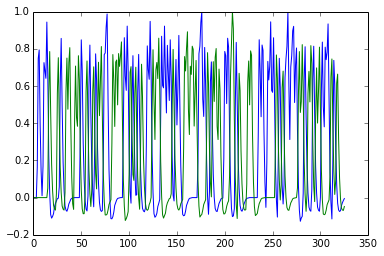

In [368]:
#plt.plot(fitted_test_design.reshape(6, 6, 2, 3, 2, -1, 2)[i,j,0,k,0][:100])
plt.plot(dtrfz / dtrfz.max(0))

In [395]:
(rtrg, rtre, rtrf, rtrfz),(rtg, rte, rtf, rtfz), (bg, be, bf, bfz),\
(1 - rtg  / ytn, 1 - rte  / ytn, 1 - rtf  / ytn, 1 - rtfz  / ytn),\
(1 - rtrg  / ytrn, 1 - rtre  / ytrn, 1 - rtrf  / ytrn, 1 - rtrfz  / ytrn)

((1.2231294226794375e-35,
  1.2231294226794375e-35,
  9.14688755521022e-05,
  4.5933892289432536e-06),
 (1.0120466871881518e-35,
  1.0120466871881518e-35,
  9.5873186795433988e-05,
  5.4529897827279915e-06),
 (array([ 0.49671415, -0.1382643 ]),
  array([ 0.49671415, -0.1382643 ]),
  array([ 1.29879072, -0.33818812]),
  array([ 0.49786795, -0.13473548])),
 (1.0, 1.0, 0.96865050418169141, 0.99821693128073785),
 (1.0, 1.0, 0.97012022735184156, 0.99849949586657871))

In [404]:
test_est_resids[i, j, 0, k, 0],\
train_est_resids[i, j, 0, k, 0],\
fitted_test_resids[i, j, 0, k, 0],\
fitted_train_resids[i, j, 0, k, 0],\
zm_fitted_test_resid[i, j, 0, k, 0],\
zm_fitted_train_resid[i, j, 0, k, 0]

(0.0014068629944153975,
 0.0013227285609061555,
 1.2749123969939349,
 0.00013829395743113486,
 1.2977734939959455,
 7.8441018134969431e-07)

In [257]:
beta[i, j, 0,  k].reshape(2, 2)[0, :]

array([ 0.49671415, -0.1382643 ])

In [390]:
cat = np.hstack([dtrg / np.linalg.norm(dtrg, axis=0), dtrfz / np.linalg.norm(dtrfz, axis=0)])
np.corrcoef(dtrg.T, dtrfz.T),\
cat.T.dot(cat)

(array([[ 1.        , -0.61569408,  0.99888616, -0.6218478 ],
        [-0.61569408,  1.        , -0.61986777,  0.9985484 ],
        [ 0.99888616, -0.61986777,  1.        , -0.62622088],
        [-0.6218478 ,  0.9985484 , -0.62622088,  1.        ]]),
 array([[ 1.        , -0.02828071,  0.99926457, -0.02539245],
        [-0.02828071,  1.        , -0.02477813,  0.9990437 ],
        [ 0.99926457, -0.02477813,  1.        , -0.02194632],
        [-0.02539245,  0.9990437 , -0.02194632,  1.        ]]))

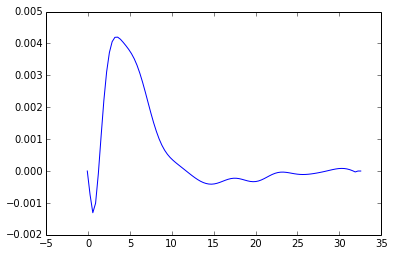

In [370]:
extra_points = np.array([-.1, 0., 32., 33.])
extra_values = np.zeros_like(extra_points)
f_hrf = interp1d(np.concatenate([points[order], extra_points]),
                    np.concatenate([hrf, extra_values]))
plt.plot(np.linspace(-.1, 32.9, 100, endpoint=False), f_hrf(np.linspace(-.1, 32.9, 100, endpoint=False)))

False

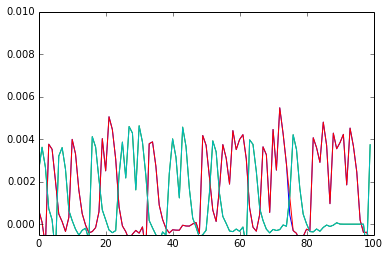

In [371]:
paradigm = test_paradigms[0]
frame_times = frame_times_run
design_ = make_design_matrix_hrf(frame_times_run, paradigm, f_hrf=f_hrf)
design = design_[event_types].values
plt.plot(design[100:200])
plt.plot(dtf[100:200])
dtf[175] = .5 * (dtf[174] + dtf[176])
plt.axis([0, 100, -.0005, .01])
np.argmax(dtf, axis=0)
np.isnan(design).any()

In [321]:
test_paradigms[0]['onset'].max()

630.77067531921921

In [319]:
test_paradigms[0][test_paradigms[0]['onset'] < 380].iloc[-5:]

,name,onset
51,ev2,348.358181
52,ev1,360.728563
53,ev1,366.501688
54,ev1,372.928980
55,ev1,378.108485


In [298]:
np.abs(dtf).sum(axis=0) / np.sqrt((np.abs(dtf) ** 2).sum(axis=0)),\
np.abs(design).sum(axis=0) / np.sqrt((np.abs(design) ** 2).sum(axis=0))

(array([  1.01190318,  13.06032219]), array([ 12.77607079,  12.80514774]))

array([ 0.10990669])

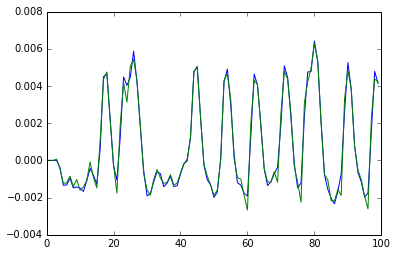

In [272]:
plt.plot(yt[:100])
plt.plot(ptf[:100])
np.correlate(yt, ptf)

NameError: name 'train_train_norms' is not defined

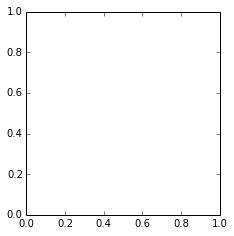

In [273]:
plt.figure(figsize=(16, 8))
for i in range(7):
    plt.subplot(2, 4, i + 1)
    plt.imshow(train_train_norms[..., i], interpolation='nearest')
    plt.colorbar()
noise_levels

In [295]:
train_test_norms = train_gen_test_est.reshape(7, 7, 3, 7, 4).mean(2).mean(-1)
train_gen_test_est.shape

(7, 7, 3, 28)

array([  1.00000000e+00,   1.00000000e-01,   2.00000000e+00,
         1.00000000e-02,   1.00000000e+01,   0.00000000e+00,
         1.00000000e+02])

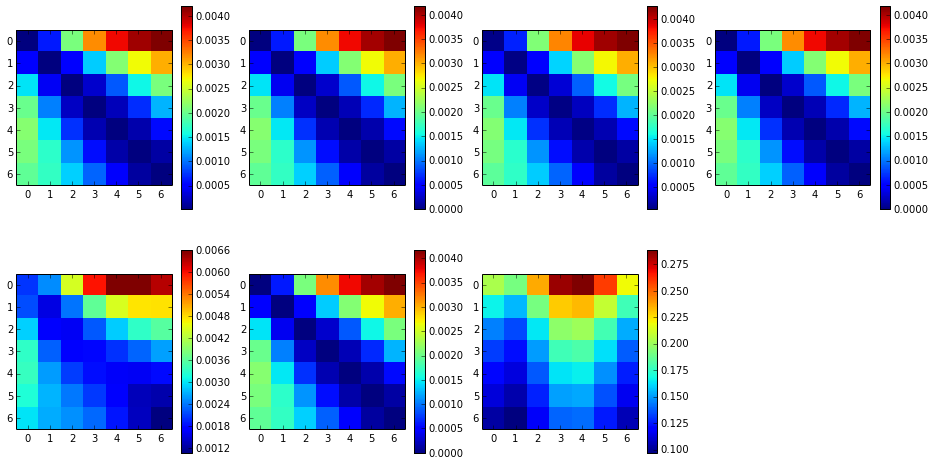

In [296]:
plt.figure(figsize=(16, 8))
for i in range(7):
    plt.subplot(2, 4, i + 1)
    plt.imshow(train_test_norms[..., i], interpolation='nearest')
#    plt.imshow(train_gen_test_est[:, :,0, i + 18], interpolation='nearest')

    plt.colorbar()
noise_levels


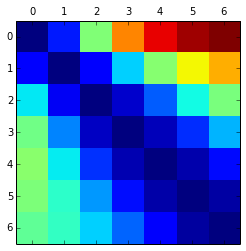

In [297]:
plt.matshow(test_est_test_est.mean(-1).mean(-1))

In [312]:
train_est_resids.shape

(7, 7, 3, 28)

In [315]:
train_test_norms = test_est_resids.reshape(7, 7, 3, 7, 4).mean(2).mean(-1)

array([  1.00000000e+00,   1.00000000e-01,   2.00000000e+00,
         1.00000000e-02,   1.00000000e+01,   0.00000000e+00,
         1.00000000e+02])

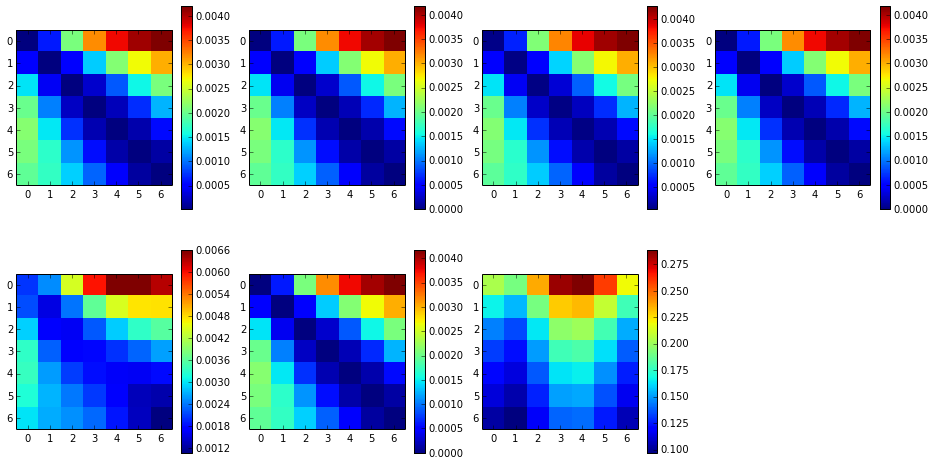

In [316]:
plt.figure(figsize=(16, 8))
for i in range(7):
    plt.subplot(2, 4, i + 1)
    plt.imshow(train_test_norms[..., i], interpolation='nearest')
#    plt.imshow(train_gen_test_est[:, :,0, i + 18], interpolation='nearest')

    plt.colorbar()
noise_levels


In [28]:
y_train_noisy.shape

(770, 20)

In [6]:
y_train_norms

NameError: name 'y_train_norms' is not defined

In [318]:
c_hrf_measurement_points = np.concatenate(hrf_measurement_points)
order = np.argsort(c_hrf_measurement_points)

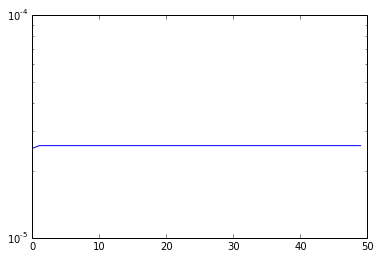

In [327]:
plt.plot((np.array(looes) ** 2).mean(1))
plt.yscale('log')

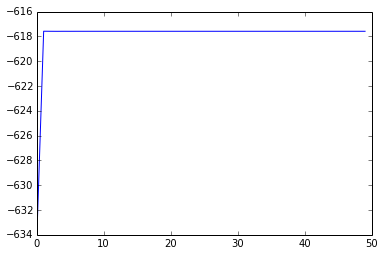

In [328]:
plt.plot(np.array(lls))

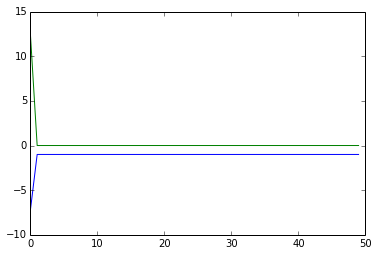

In [329]:
plt.plot(np.array(grads))

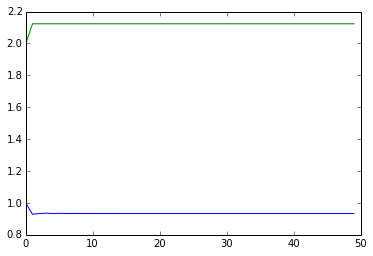

In [330]:
plt.plot(np.exp(np.array(thetas)))

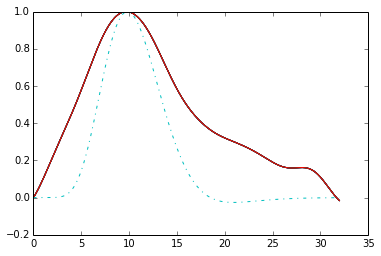

In [334]:
true_hrf = f_sim_hrf(c_hrf_measurement_points[order])
plt.plot(c_hrf_measurement_points[order], (np.array(hrfs).T[order]/ np.array(hrfs).T.max(0))[:, -10:], '-')
plt.plot(c_hrf_measurement_points[order], true_hrf / true_hrf.max(), '-.')

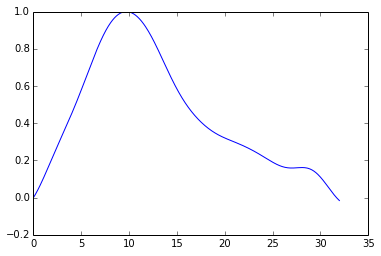

In [335]:
plt.plot(c_hrf_measurement_points[order], (np.array(hrfs).T[order])[:, -1:], '-')


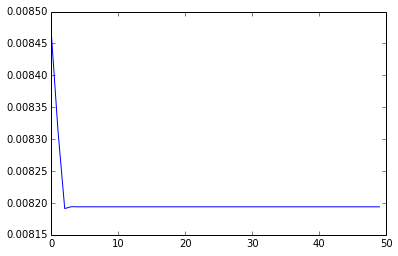

In [336]:
plt.plot(residuals)

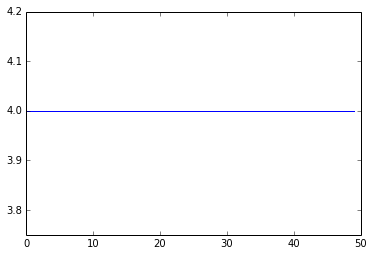

In [290]:
plt.plot(sigmas_squared)